In [1]:
from assets.pdfshow import pdfshowOption, pdfGet
from assets.startup import startupOption, display_whitespace, clear_output, initialize, goodbye
pdfshowOption['mini'] = False
startupOption['debug'] = False
initialize()

$\newcommand{\mbb}[1]{\mathbb{#1}}
\newcommand{\mrm}[1]{\mathrm{#1}}
\newcommand{\mcal}[1]{\mathcal{#1}}
\newcommand{\tup}[1]{\textup{#1}}
\newcommand{\idty}{\mathds{1}}
%Specials
\newcommand{\hodgedual}{\operatorname{\star}}
\newcommand{\dual}{\ \xlongleftrightarrow{\ \textrm{dual}\ }\ }
\newcommand{\abs}[1]{\left|#1\right|}
\newcommand{\norm}[1]{\left\|#1\right\|}
\newcommand{\pqty}[1]{\left(#1\right)}
\renewcommand{\idty}{\mathbf{1}}
$
        <style>
            img.inline_img {
                display: unset;
                margin-top: unset;
            }
            .MathJax_Display {
                margin: 6px;
            }
            .dataframe td {
                white-space: nowrap;
            }
        </style>
        <script>
            IPython.OutputArea.prototype._should_scroll = function(lines) {
                return false;
            }
        </script>
    <script src="assets/frame_loaded.js"></script>`< Initialization cell >`

### README
> 姓名：Bryan &nbsp;&nbsp; 学号：1500066666
>
> ** 请首先阅读该目录下的 `README.md` 文档！** <br/>
> ** 完整运行本文档需要大概半分多钟！ **
>
> 助教老师好～ 本人不用 `\usepackage` 无法生存 <img class="inline_img" src="https://bryango.github.io/assets/coolemoji/d_erha.png" width="24px" />, 但又难以拒绝 jupyter 的交互式环境，于是捣鼓出了一个解决方案：先用 (Xe) $\mathrm{\LaTeX}$ 编译成 PDF, 再用 [PDF.js](https://github.com/mozilla/pdf.js/) 嵌入到此文档当中。**若想运行文档中的代码，务必先 `restart & run all` 一下**。相应的实现过程与格式优化置于 `assets/` 目录内，不属于作业的核心内容。
>
> 若 PDF.js 不能正常调用，可以尝试 mini 模式；只需将初始化单元中的 `mini` 选项改为 `True` 即可：
```python
pdfshow_option['mini'] = True
```
此时 PDF 将由浏览器的内置阅读器打开。这样显示的 PDF 将被限制在一定高度的输出框内，无法展开；`exN_mini.html` 即在此模式下生成。
此外，文中的理论分析整合为文档：[`document.pdf`](latex/document.pdf), 便于打印、独立阅读。
>
> ----------------
> 另外，本次作业中的部分代码与作业核心内容关系紧密，但终究不是重点；这些代码要么来源于前面的作业、要么是函数作图命令（`matplotlib` 的一些操作）等等。它们往往冗长而无趣，故隐于 module 当中；它们位于目录 `pycode/` 之下。
>
> 核心代码均显示在了文档当中，但实际也多是自成 module, 通过 `some_function??` 显示；这里采用了[一个 hack](http://nbviewer.jupyter.org/gist/minrk/7715212), 使 pager 显示在行内。如果觉得太长碍事，只需将 `some_function??` 注释掉即可。在前面的初始化单元之 `assets.startup` 中，已通过命令：
```python
sys.path.append('pycode')
```
将引用目录加入到了 `sys.path` 当中，因此下文中的引用并未出现 `pycode` 前缀。
>
> ----------------
> 此外，本人刚入门 python, js 和 css 也是现学的，上述系统（以及下面的作业）显然还有许多 bug, 如使用 PDF.js 时无法导出 html 文档；此处只得暂时搁置，由此造成的麻烦，本人深表歉意...
>
> 万分感谢～

In [2]:
pdfGet('latex/sections/0.title.pdf').show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown

# If u DON'T HAVE LaTeX, change this to `FALSE`!
# But it would look much better if u use LaTeX...
tex_status = True
plt.rc('text', usetex=tex_status)
plt.rc('text.latex', unicode=tex_status)

## 1. QR 分解
下面比较两种 QR 分解方法。首先，理论估计：
### (a) QR 分解的算法复杂度

In [4]:
pdfGet('latex/sections/1.qr_complexity.pdf').show()

### (b) Householder 变换法求 QR 分解
为实现完整的 Householder 约化，这里首先编写一个子程序，以实现子空间中的 Householder 约化（将矢量 $x$ 的所有分量转移到第一个分量上）：

In [5]:
from toolkit.qrdecomp import householder_vector
householder_vector??

def householder_vector(input_vector: list, round_accuracy=16) \
        -> (float, list):
    """ Construct aHouseholder reduction,
        which move all components of `input_vector` to its 1st entry;
        :return: Householder vector v (normal vector of reflection) & its norm,
            as in (v_square, v).
    """
    # Normalize input_vector by inf-norm to prevent overflow; DEEPCOPY
    x_max = max(map(abs, input_vector))
    v = list(map(lambda x: x / x_max, input_vector))
    # Euclidean norm
    res_square = sum(x_i**2 for x_i in v[1:])
    x_norm = sqrt(res_square + v[0]**2)

    if round(res_square, round_accuracy) != 0:
        if v[0] <= 0:
            v[0] -= x_norm  # Minus so that end result is positive
        else:
            v[0] = - res_square / (v[0] + x_norm)  # Better accuracy
        v_square = v[0]**2 + res_square
        return (v_square, v)
    else:
        return (0., [0.] * len(v))


** 与朴素的 Householder 变换相比，跟据[参考教材](http://www.bookask.com/book/13300.html)， 这里额外进行了一些优化： **
* 为避免求模方时发生上、下溢，对 $x$ 按最大分量进行了缩放（注释为 `# Normalize input_vector ... ` , 见上）；
* Householder 矢量 $v$ 的选取有一定的自由度；具体而言，$v$ 作为镜面反射的法向量，可选：
$$ v = x \pm \norm{x}e_0 $$
这里统一使 $H = \idty - 2vv^\mrm{T}/\norm{v}^2$ 的作用结果为正，则相应地应取 $v = x - \norm{x}e_0$ . 
* 计算 $v = x - \norm{x}e_0$ 时，还得当心大数相消；对首个分量 $x_0 > 0$, 注意到相应的：
$$ v_0 = x_0 - \norm{x}
= \frac{x_0^2 - \norm{x}^2}{x_0 + \norm{x}}
= - \frac{1}{x_0 + \norm{x}} \pqty{x_1^2 + x_2^2 + \cdots}$$
这样即可避免大数相消。程序实现时，额外定义了 `res_square` $= \pqty{x_1^2 + x_2^2 + \cdots}$, 以避免重复计算。

利用这一子程序，可以更为简洁地写出完整的 Householder 约化：

In [6]:
from toolkit.qrdecomp import qr_householder
qr_householder??

def qr_householder(matrix_input: list,
                   round_accuracy=16,
                   matrix_check='notChecked') -> (list, list):
    """ QR decomposition by Householder;
        :return: Q, R matrices.
    """
    r_mat = deepcopy(matrix_input)
    n = matrix_check_dim(r_mat, check=matrix_check, spec='square')[0]

    v_list = []  # List of Householder vectors, as in (v_square, v)
    q_mat = identity_matrix(n)  # Initialize Q as identity matrix

    # k as column index
    for k in range(n - 1):
        # Take diagonal, and elements below
        v_square, v = householder_vector(
            [ r_i[k] for r_i in r_mat[k:] ], round_accuracy
        )
        v_list.append((v_square, v))

        vt_dot_r = [ sum(v[l - k] * r_mat[l][j] for l in range(k, n))
                     for j in range(k, n) ]
        for i in range(k, n):
            coefficient = 2 * v[i - k] / v_square
            for j in range(k, n):
                r_mat[i][j] -= coefficient * vt_dot_r[j - k]

   

### (c) Givens 变换法求 QR 分解
Givens 变换在程序操作上实际更为简单，实现如下：

In [7]:
from toolkit.qrdecomp import qr_givens
qr_givens??

def qr_givens(matrix_input: list,
              round_accuracy=16,
              matrix_check='notChecked') -> (list, list):
    """ QR decomposition by Givens;
        :return: Q, R matrices.
    """
    r_mat = deepcopy(matrix_input)
    n = matrix_check_dim(r_mat, check=matrix_check, spec='square')[0]

    q_mat = identity_matrix(n)
    for i in range(1, n):
        for j in range(i):
            # Eliminate (i, j), for j < i
            if round(r_mat[i][j], round_accuracy) != 0.:
                smaller, larger = sorted(
                    map(abs, (r_mat[j][j], r_mat[i][j]))
                )
                scale = larger * sqrt(1 + (smaller / larger) ** 2)

                c = r_mat[j][j] / scale  # Cosine
                s = r_mat[i][j] / scale  # Sine

                # Previous iterations have ensured that for k < j < i,
                #   r_mat[i][k] = 0, r_mat[j][k] = 0.
                # Therefore, summations need not go all the way from 1 to n.
                for k in

### (d) 两种方法运行速度比较
生成随机矩阵，
```python
from qr_benchmark import random_matrices
```
利用 `timeit` 比较两种算法的运行速度，得平均耗时（以秒记）如下：

In [8]:
from backstage import QRBench
qr_data = QRBench()
qr_data.add(dim=6, sample_size=20, runs=20)

$n$ as dim,Householder,Givens,ratio
6,0.000261,0.000206,0.788998


表中还给出了两者耗时之比（ratio）；有趣的是，与预估不同，Householder 方法似乎更慢一些！增加随机矩阵的维度（$n$ as dim），重复实验，可得：

In [9]:
qr_data.add(dim=12, sample_size=10, runs=20)
qr_data.add(dim=24, sample_size=10, runs=10)
qr_data.add(dim=48, sample_size=5, runs=3)
qr_data.add(dim=96, sample_size=3, runs=2)

$n$ as dim,Householder,Givens,ratio
6,0.000261,0.000206,0.788998
12,0.000775,0.000996,1.284362
24,0.005057,0.004949,0.978479
48,0.031866,0.040193,1.261314
96,0.199642,0.256594,1.285267


*大 $n$ 的数值实验中，为缩短程序运行时间，相应地减少了测试样本数量（由参数 `sample_size` 和运行次数 `runs` 决定）。*

可见，在更大 $n$ 的情形下，确实是 Givens 方法更慢，与理论计算一致（理论给出两者的计算量之比 $\sim \pqty{4n^3} \big/ \pqty{\frac{8}{3}n^3} = 1.5$, 和上述结果相比，还是比较相近的）。注意到 Householder 方法的程序实现比较复杂，即计算量的 $n^2$ 阶余项比较显著，这大概是小 $n$ 情况下 Householder 更慢的主要原因。

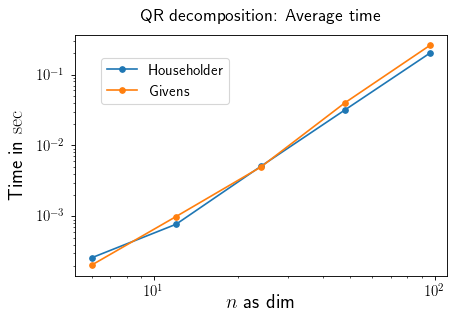

In [10]:
%matplotlib inline
display_whitespace(.5)
qr_data.plot()

运算量随 $n$ 的增大规律如上图所示；注意图像为对数标度，可见对大 $n$ 而言，近似有计算量 $\sim n^3$. 具体而言，作线性回归，考虑 $n^2$ 等低阶项的贡献，应当有斜率 $\sim 2.\mrm{xxx}$ 接近 3. 事实确是如此；弃去 $n = 6$ 数据点，回归分析给出：

In [11]:
qr_data.fit(start_index=1)

Estimated order: n = [12, 24, 48, 96], 
  -> Householder:  2.668097494978451
  -> Givens:       2.7050336897714837


大 $n$ 极限下，数值实验给出的阶数应当渐趋于 3 ; 例如，取上述最后两点数据，将给出明显更接近 3 的结果：

In [12]:
qr_data.fit(start_index=3)

Estimated order: n = [48, 96], 
  -> Householder:  2.6473185616404025
  -> Givens:       2.6744593473811413


## 2. 幂次法求本征值
### (a) 物理背景

In [13]:
pdfGet('latex/sections/2.lattice_vibration.pdf').show()

### (b) 幂次法数值求解

幂次法适用于一般的复矩阵，这里有必要实现相应的复数运算。幸运的是，Python 原生支持复数，虚单位记为 `j` . 由此，即可实现幂次法迭代：

In [14]:
from toolkit.eigensys import max_eigensystem
max_eigensystem??

def max_eigensystem(coefficient_matrix, accuarcy=10**-16, max_runs=10,
                    notify=True):
    """ Find maximum eigenvalue & corresponding eigenvector,
        using power iteration.
        :param max_runs: max attempts,
            for random generations of initial eigenvector
        :return: (eigenvalue, eigenvector)
    """
    a_mat = deepcopy(coefficient_matrix)
    n = matrix_check_dim(a_mat, spec='square')[0]

    # Initial eigenvalue
    v = 0.
    attempts = 0
    stuck = False
    ever_stuck = False

    # Iteration starts from a random real vector
    # Regenerate! If eigenvalue v falls back to 0,
    # ... or stuck in loop
    while attempts < max_runs and any([
        round(v, int(-log10(accuarcy))) == 0,
        stuck is True
    ]):
        attempts += 1

        # Notation: liuchuan's Numerical.pdf, ver 0.98
        z_vec = [ random.uniform(-1, 1) for _ in range(n) ]
        q_vec = normalize_max(z_vec)
        # Arbitrary `diff` to kickstart iteration


**这里有几点需要说明：** 首先，迭代过程中，需要对本征矢量进行归一化；这一步的主要目的是防止溢出，因此可以取任一种矢量模 $\norm{\cdot}$ 进行归一化，而不一定取欧式模；这里采用最简单的办法，即先将 $n$ 维复矢量视为 $2n$ 维实矢量，再取无穷模（最大分量）。实现如下：

In [15]:
from toolkit.generic import normalize_max
normalize_max??

def normalize_max(vec: list):
    """ Normalize a (complex) vector, by its max (real) parameter """
    vec_imag = list(map(lambda x: x.imag, vec))
    if vec_imag != [0] * len(vec):
        vec_real_params = list(map(lambda x: x.real, vec))
        vec_real_params.extend(vec_imag)
    else:
        vec_real_params = vec

    param_max = max(map(abs, vec_real_params))
    try:
        return [x / param_max for x in vec]
    except ZeroDivisionError:
        return [0. for _ in range(len(vec))]


类似地，在定义欧式模方时，也应当防止溢出。这一观点在前面实现 QR 分解时已有提出，此处只不过还需考虑复数模方；这在程序中以
```python
from toolkit.generic import vec_square
```
加以实现，此处不再赘述。

------

**此外，对病态的问题而言，迭代很可能根本不收敛！** 相应地，程序中设置 1 秒钟的 `timeout`, 以避免迭代卡死（`stuck`）带来的麻烦。如果迭代失败（可能是卡死，也可能是矢量落入矩阵的核（kernel, or simply $\ker$）从而本征值 $v \to 0$），则重取初始矢量（随机生成），再来一次。

*默认“推倒重来”的次数上限为 `max_runs=10` , 尝试次数（`attempts`）达到上限则通过 `print` 报告。*

--------

对一维原子链而言，系数矩阵 $A$ 实现为：

In [16]:
from lattice_vibrations import stiffness_matrix_element
stiffness_matrix_element??

def stiffness_matrix_element(dim: int, i: int, j: int):
    def main_components(i: int, j: int):
        if i == j:
            return 2
        elif j in (i + 1, i - 1):
            return -1
        else:
            return 0

    if isinstance(dim, int) and dim > 1:
        if (i, j) in [(0, dim - 1), (dim - 1, 0)]:
            return main_components(i, j) - 1
        elif all( index in range(dim) for index in [i, j] ):
            return main_components(i, j)
        else:
            raise IndexError('illegal index for matrix_element')
    else:
        raise IndexError('illegal dimension for matrix_element')


这一函数不仅可以给出 $n \ge 3$ 的情形，还可适用于 $n = 2$ 的情形。利用这一函数构造矩阵，无需事先构造矩阵，只需在调用时临时生成即可；为模仿列表的指标记号，定义 `MatrixByRule` 类：

In [17]:
from toolkit.generic import ListByRule, MatrixByRule
display_whitespace(0.)
MatrixByRule??
display_whitespace(0.)
ListByRule??

class MatrixByRule(ListByRule):
    """ Construct SQUARE matrix, according to a certain rule (function);
        :param func: input function, with argument (i, j);
        :param dim: dimension of the matrix.
        SLICING IS NOT SUPPORTED!
        P.S. `__init__`, `dim` & `print` inherited from `ListByRule`.
    """
    def rule(self, i, j):
        entry = (i_reduced, j_reduced) = [ x % self.dim for x in [i, j] ]
        if all( item in range(self.dim) for item in entry ):
            return self.func(*entry)
        else:
            raise IndexError('illegal index for MatrixByRule')

    def __getitem__(self, key):
        return ListByRule(lambda i: self.rule(key, i), self.dim)

    def list(self):
        return [ [self.rule(i, j) for j in range(self.dim)]
                 for i in range(self.dim) ]


class ListByRule(object):
    """ Construct list according to a certain rule (function);
        :param func: input function, with argument i as list index;
        :param length: length of the list.
        SLICING IS NOT SUPPORTED!
    """
    def __init__(self, func, dim: int):
        self.dim = dim
        self.func = func

    def dimension(self):
        return self.dim

    def print(self):
        return print_matrix(self.list())

    def rule(self, i):
        i_reduced = i % self.dim
        if i_reduced in range(self.dim):
            return self.func(i_reduced)
        else:
            raise IndexError('illegal index for ListByRule')

    def __getitem__(self, key):
        return self.rule(key)

    def list(self):
        return [ self.rule(i) for i in range(self.dim) ]


通过 `__getitem__` 这一 method 实现与列表一样的指标读取。代入 `max_eigensystem`, 给出：

In [18]:
from backstage import LatticeMaxModes
lattice_data = LatticeMaxModes()
lattice_data.add(length=10)

Length $N$,Eigenvalue,Eigenvector
10,4.000000,"[-1., 1., -1., 1., -1., 1., -1., 1., -1., 1.]"


与理论结果一致。尝试改变 $N$, 对 $N = $ 奇数，有：

In [19]:
%precision 6
length_N = 9
lattice_data.add(length_N)

%precision
print('')
lattice_data.eigenvalue_calc(length_N)
lattice_data.eigenvalue_ref(length_N)


N = 9, Eigenvalue (numerical result): 3.8793852415718173


$\mrm{Ref}\colon\ 4 \cos^2 \pqty{\frac{\pi}{2N}} \big|_{\,N = 9} = 3.8793852415718164 $

同样与理论预计一致。

然而，不难发现，$N = $ 奇数时，上述迭代极有可能并不收敛！只要将上一 cell 多运行几次，总能看见一两回 `did not converge!`  的报告；这也是原程序中设置 `timeout` 的主要动机。

事实上，根据[参考教材](http://www.bookask.com/book/13300.html)，幂次法的收敛速度取决于 $\abs{\frac{\lambda_2}{\lambda_1}}$ , 其中 $\lambda_1$ 是模最大本征值，而 $\lambda_2$ 是模次大本征值；只有 $\abs{\lambda_1}$ *严格大于* $\abs{\lambda_2}$ 时，收敛性才有保证。也就是说，将本征值 $\lambda_i$ 排成一列，应当有：
$$ \abs{\lambda_1} > \abs{\lambda_2} \ge \cdots $$
否则，幂次法完全有可能不收敛。对 $N = $ 奇数的一维原子链而言，$\lambda_{\max} = \omega^2_{\max}$ 是二重简并的，即直接有 $\lambda_1 = \lambda_2$, 幂法迭代不保证收敛；虽说对某些初始矢量而言，该方法实际能够收敛到某个本征矢量，但对于不同的初始值而言，最终收敛到的矢量可能是完全不同（线性无关）的，它们只不过是 $\lambda_{\max}$ 简并子空间中的一些特殊元素，可以有很大的任意性。而 $N = $ 偶数满足 $ \abs{\lambda_1} > \abs{\lambda_2} \ge \cdots $ 的条件，故其迭代收敛没有任何问题。

In [20]:
%precision 6
display(lattice_data.add_multiple(range(2,9)))

`max_eigensystem`: Iteration did not converge! dim = 5, Re-trying ...
--------------------------------
`max_eigensystem`: Iteration did not converge! dim = 7, Re-trying ...
--------------------------------


Length $N$,Eigenvalue,Eigenvector
2,4.000000,"[-1., 1.]"
3,3.000000,"[-1. , 0.069713, 0.930287]"
4,4.000000,"[ 1., -1., 1., -1.]"
5,3.618034,"[ 0.981568, -0.588211, -0.029823, 0.636466, -1. ]"
6,4.000000,"[ 1., -1., 1., -1., 1., -1.]"
7,3.801938,"[-0.760568, 0.393455, 0.051587, -0.486412, 0.824896, -1. , 0.977042]"
8,4.000000,"[ 1., -1., 1., -1., 1., -1., 1., -1.]"
9,3.879385,"[ 1. , -0.954464, 0.793805, -0.537402, 0.21618 , 0.131116, -0.462598, 0.738284, -0.924921]"
10,4.000000,"[-1., 1., -1., 1., -1., 1., -1., 1., -1., 1.]"


重复运行上条命令，确实可见 $N = $ 奇数时收敛到的本征矢量总在发生变化，而且迭代不收敛的情况仅在 $N = $ 奇数时发生。<br/>
比较本征值的计算结果与理论公式，可见完全吻合：

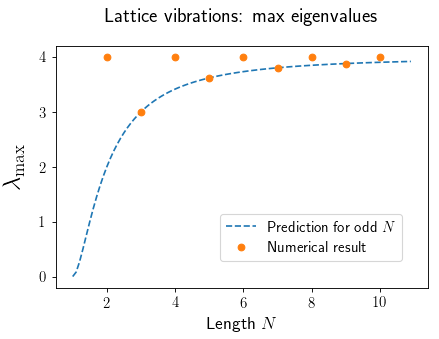

In [21]:
%matplotlib inline
display_whitespace(.5)
lattice_data.eigenvalues_plot()

------
对 $N = 3$, 我们可以进一步验证，最终收敛到的矢量 *基本上* 是任意的；首先，迭代生成 `max_size=100` 组本征矢量：

In [22]:
from backstage import LatticeMaxModes

In [23]:
length_N = 3
lattice_data.eigenvector_list(length_N, max_size=100,
                              output=f'csv/lattice_length{length_N}.csv');

作图如下：

<IPython.core.display.Javascript object>


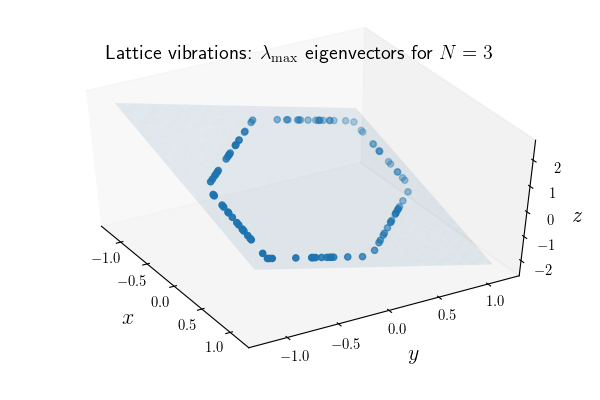

In [24]:
from backstage import eigenvectors_plot_3d

if pdfshowOption['mini'] is True:
    # STILL IMAGE:
    %matplotlib inline
else:
    # INTERACTIVE VERSION:
    %matplotlib notebook
    %matplotlib notebook
    %matplotlib notebook
    # Why repeat three times?
    # This is a bug of ipynb:
    # ... see: <stackoverflow.com/a/41251483>
    # ... and: <github.com/jupyter/notebook/issues/473>
    # If still, nothing shows up,
    # ... just use `%matplotlib inline` (less fun).

eigenvectors_plot_3d(f'csv/lattice_length{length_N}.csv')

可见本征矢量落在 $\lambda_{\max}$ 对应的二维子空间中，且其方向的确基本上是任意的。

综上，幂次法在 $\abs{\lambda}_{\max}$ 严格最大的情况下是很好用的；若 $\abs{\lambda}_{\max}$ 并非严格最大，则幂次法的收敛性没有保障。然而，通过重取迭代起点、多次实验，往往也能得到丰富的信息（只是此时应恰当设计程序以避免卡死）。

In [25]:
goodbye('ex3')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook ex3.ipynb to script
